In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from matplotlib.ticker import FuncFormatter

In [2]:
with open('../results/institutions_works_count_years.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data).transpose()
df = df.T
df.index = pd.to_numeric(df.index)

In [3]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20 

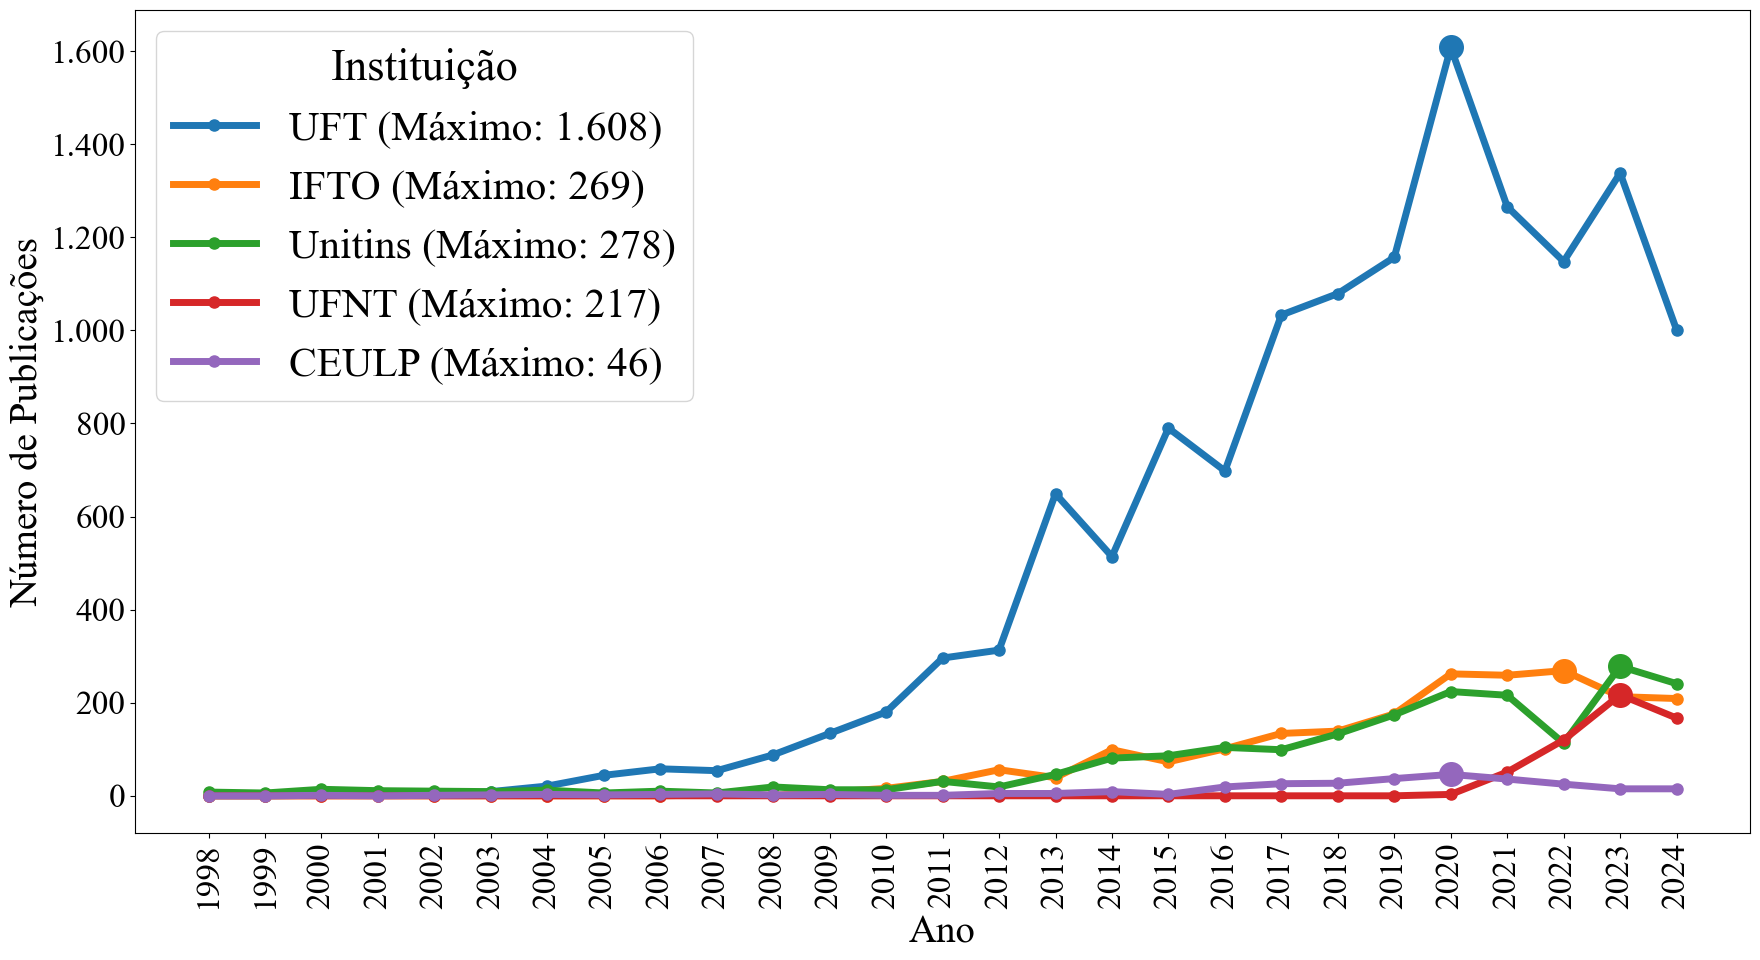

In [4]:
total_works = df.sum().sort_values(ascending=False)
sorted_columns = total_works.index.tolist()

fig, ax = plt.subplots(figsize=(18, 10))

max_values = {}
line_colors = {}
for column in sorted_columns:
    line, = ax.plot(df.index, df[column], label=column, marker='o', markersize=8, linewidth=5)
    line_color = line.get_color()
    line_colors[column] = line_color

    max_value = df[column].max()
    max_year = df[column].idxmax()
    max_values[column] = max_value

    ax.plot(max_year, max_value, marker='o', markersize=16, color=line_color, linestyle='None',
            markeredgecolor=line_color, markeredgewidth=2)

all_years = df.index.tolist()
ax.set_xticks(all_years)
ax.tick_params(axis='x', rotation=90, labelsize=24)

formatter = FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis='y', labelsize=24)


ax.set_xlabel('Ano', fontsize=28)
ax.set_ylabel('Número de Publicações', fontsize=28)

legend_handles = []
legend_labels = []

handles, labels = ax.get_legend_handles_labels()

filtered_handles_map = {label: handle for handle, label in zip(handles, labels) if label in sorted_columns}

for column in sorted_columns:
    handle = filtered_handles_map.get(column)
    if handle:
        legend_handles.append(handle)
        legend_labels.append(f'{column} (Máximo: {format(max_values[column], ",").replace(",", ".")})')

ax.legend(legend_handles, legend_labels, title='Instituição', loc='upper left', fontsize=30, title_fontsize=32)

ax.grid(False)

plt.tight_layout()
plt.savefig('../results/img/grafico_evolucao_anos.png', dpi=300, bbox_inches='tight')
plt.show()

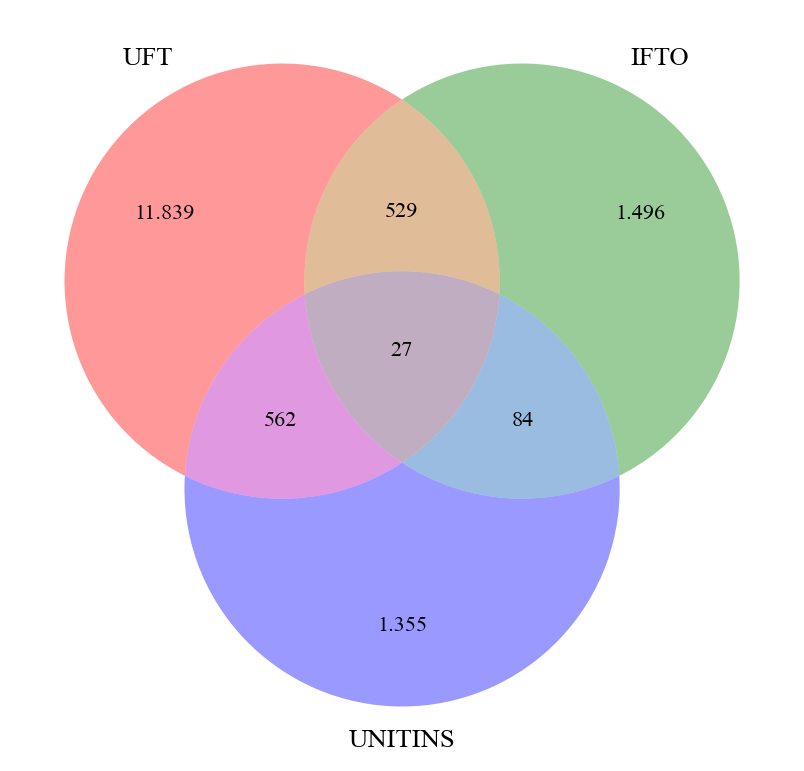

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16 

values = {
    'UFT': 11839,
    'IFTO': 1496,
    'UNITINS': 1355,
    'UFT&IFTO': 529,
    'UFT&UNITINS': 562,
    'IFTO&UNITINS': 84,
    'UFT&IFTO&UNITINS': 27
}

fig, ax = plt.subplots(figsize=(10, 8))

v = venn3(subsets=(1,1,1,1,1,1,0.01),
           set_labels=('UFT', 'IFTO', 'UNITINS'),
           ax=ax)

v.get_label_by_id('100').set_text(f"{values['UFT']:,}".replace(",", "."))
v.get_label_by_id('010').set_text(f"{values['IFTO']:,}".replace(",", "."))
v.get_label_by_id('001').set_text(f"{values['UNITINS']:,}".replace(",", "."))
v.get_label_by_id('110').set_text(f"{values['UFT&IFTO']:,}".replace(",", "."))
v.get_label_by_id('101').set_text(f"{values['UFT&UNITINS']:,}".replace(",", "."))
v.get_label_by_id('011').set_text(f"{values['IFTO&UNITINS']:,}".replace(",", "."))
v.get_label_by_id('111').set_text(f"{values['UFT&IFTO&UNITINS']:,}".replace(",", "."))

plt.tight_layout()
plt.savefig('../results/img/diagrama_venn.png', dpi=300, bbox_inches='tight')
plt.show()